In [2]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

In [3]:
# 讀取資料集
iris = datasets.load_iris()
df_data = pd.read_csv('iris.csv')

In [ ]:
#  查看檔案
df_data

In [4]:
# 刪除 標籤ID 因為不參與 運算
df_data = df_data.drop(labels=['Id'], axis=1)

In [5]:
# 調整 Species 的值 改成 012 ，讓決策樹可以計算
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [6]:
# 檢查缺失值
print("checked missing data(NAN mount):",len(np.where(np.isnan(9))[0]))
# 移除缺失值 train=train.dropna()

checked missing data(NAN mount): 0


In [7]:
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


3) 設定 X=資料  y=標籤

In [6]:
X = df_data.drop(labels=['Class','Species'],axis=1).values
y = df_data['Class'].values

4) 切割訓練集 與 測試集

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=.3 , random_state=42)

In [8]:
print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (105, 4)
Testing data shape: (45, 4)


建立模型
- XBosst：Boosting 希望能夠由後面生成的樹，來修正前面樹學的不好的地方

In [9]:
# 建立XGBClassifier模型
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgb.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgb.predict(X_train)

[21:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Score評估模型

In [10]:
print('訓練集: ', xgb.score(X_train, y_train))
print('測試集: ', xgb.score(X_test, y_test))

訓練集:  1.0
測試集:  1.0


特徵重要程度

特徵重要程度:  [0.01021995 0.03037913 0.7386953  0.22070564]


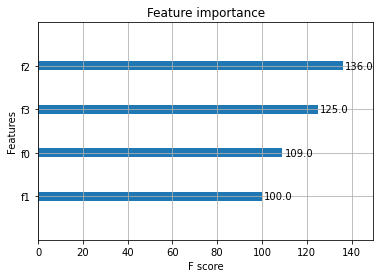

In [13]:
from xgboost import plot_importance
from xgboost import plot_tree

plot_importance(xgb)
print('特徵重要程度: ',xgb.feature_importances_)

真實分類

In [ ]:
# 建立訓練集的 DataFrme
df_train=pd.DataFrame(X_train)
df_train['Class']=y_train
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test)
df_test['Class']=y_test

In [ ]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Class', data=df_train, fit_reg=False)

XGB (訓練集)預測結果

In [ ]:
df_train['Predict']=predicted
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_train, hue="Predict", fit_reg=False)
plt.show()